# Projeto 2 - Classificação usando dados de Cancer de Mama
## Breast Cancer Coimbra Data Set - UCI

## Introdução

O conjunto de dados de Cancer Mama esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra. O objetivo deste conjunto de dados é classificar se um individuo possui ou não cancer de mama a partir destas variaveis obtidas através do exame de sangue.


Segue a descrição das variaveis:
- Age: idade em anos
- BMI: indice de massa corporal (kg/m2)
- Glucose: nivel de glicose no sangue (mg/dL)
- Insulin: nivel de insulina no sangue (µU/mL)
- HOMA: nivel de resistencia a insulina
- Leptin: leptina (ng/mL)
- Adiponectin: Adiponectina (µg/mL)
- Resistin: Resistina (ng/mL)
- MCP-1: nivel de proteina MCP-1 (pg/dL)
- Classification: é classificado como 1 sem cancer (grupo controle) e 2 com cancer (grupo paciente)

Para mais informações, segue o link do artigo: https://bmccancer.biomedcentral.com/articles/10.1186/s12885-017-3877-1

#### referencia: 
Patrício, M., Pereira, J., Crisóstomo, J., Matafome, P., Gomes, M., Seiça, R., & Caramelo, F. (2018). Using Resistin, glucose, age and BMI to predict the presence of breast cancer. BMC Cancer, 18(1).

# Sobre este projeto

Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo usando regressão logistica e justificar

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv e faça o download do conjunto de dados.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataR2.csv')
df

Mounted at /content/drive


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


# Exercicio 1. (2.0 pontos)

Escreva em até quatro frases, uma breve apresentação sobre suas ideias do conjunto de dados e adicione qualquer contexto que possa ajudar os leitores a entendê-la.

**RESPOSTA** (VALE 2.0 pontos): Após realização de exames de sangue em varios pacientes com ou sem câncer de mama, uma amostra da população foi recolhida para estudos com intuito de classificar o paciente que tem câncer atraves dos seus resultados, os exames medem a capacidade de absorção de energia pelo organismo, verificando se há uma relação entre a obesidade e seus fatores primários (Glicose, resistina, Septina, resistência insulinica e etc.) como fator ao desenvolvimento do câncer. 

# Exercicio 2. (3.0 pontos)

Explore seu conjunto de dados e crie uma história em torno deles! Pense sobre o objetivo que deseja transmitir para seus leitores.

**RESPOSTA** (VALE 0.6 pontos): (responda aqui, dê dois cliques para editar) <br>Para que fique mais facil de compreender os resultados do algortimo de regressão logistica apresentado no final desse material, será feita uma divisão de dois grupos: com câncer e sem câncer.<br>
Após divisão será feito um comparativo das variáveis obtidas pelo exame de sangue (Glicose, Insulina ... etc), com objetivo de identificar alterações relevantes entre os grupos e assim verificar se, há má absorção de energia absorvida pelo organismo, pode ser um fator relevante para diagnóstico de câncer mamário.


Você precisa criar uma visualização explicativa, ajudando o leitor a identificar uma ou mais ideias-chave no conjunto de dados. Assim, qual visualização você acha interessante destacar?

### DIVISÃO DE GRUPOS

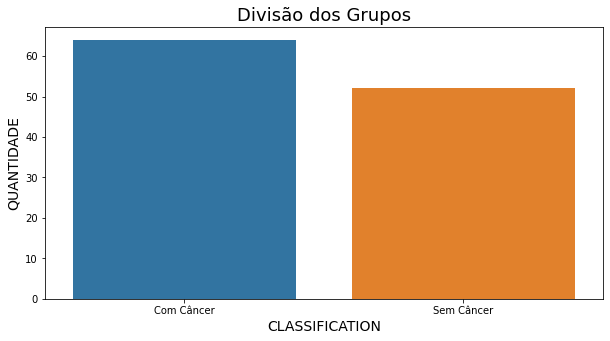

In [2]:
#### VALE 0.6 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
import seaborn as sns
import matplotlib.pyplot as plt
classificacao = ['Com Câncer','Sem Câncer']
quantidade = [sum(df.Classification == 2),sum(df.Classification == 1)]
df_classificacao = pd.DataFrame({'Classification':classificacao,'Quantidade':quantidade})



plt.figure(figsize=[10,5])
ax = sns.barplot(x = 'Classification', y = 'Quantidade', data = df_classificacao)
ax.set_title('Divisão dos Grupos', loc='center', fontsize=18)
ax.set_xlabel('Classification'.upper(), fontsize=14)
ax.set_ylabel('Quantidade'.upper(), fontsize=14)
plt.show()


O gráfico mostra o quantitativo de pacientes diagnósticado com câncer em relação aos pacientes sem câncer, no total foram 116 pacientes, sendo 64 com diagnóstico de câncer de mama e 52 voluntários que não tem a doença.

In [3]:
com_cancer = df[df['Classification']==2]
sem_cancer = df[df['Classification']==1]
print(f"A menor idade dos pacientes com câncer é de {min(com_cancer['Age'])} anos e a maior idade é de {max(com_cancer['Age'])}")
print(f"A menor idade dos pacientes sem câncer é de {min(sem_cancer['Age'])} anos e a maior idade é de {max(sem_cancer['Age'])}")


A menor idade dos pacientes com câncer é de 34 anos e a maior idade é de 86
A menor idade dos pacientes sem câncer é de 24 anos e a maior idade é de 89


### Analizando o IMC (Indice de Massa Corporal)


O IMC é um índice usado para classificar uma pessoa de acordo com o grau de excesso de peso, o calculo é realizado levando em consideração o peso e altura, basea-se em dividir o peso em Kilogramas pelo quadrado da altura: IMC = Peso / Altura²<br>
Segue abaixo Categoria com relação ao valor do IMC: 

| IMC |	Categoria |
| --- | --- |
|Abaixo de 19,1 |	Abaixo do peso |
|19,1 a 25,8 |	Peso ideal |
|25,9 a 27,3 |	Pouco acima do peso |
|27,4 a 32,3 |	Acima do peso |
|32,4 e acima |	Obesidade |
Fonte:https://indicedemassacorporal.com/movel/calculo-imc-feminino.html
<br>
OBS: A tabela retrata as categorias para individuos do gênero feminino.

In [4]:
# Montagem DataFrame IMC pacientes sem câncer
abaixo_peso = sem_cancer[sem_cancer['BMI'] < 19.1]
abaixo_p = abaixo_peso.shape[0]
peso_ideal = sem_cancer[(sem_cancer['BMI'] >= 19.1) & (sem_cancer['BMI'] < 25.9)]
p_ideal = peso_ideal.shape[0]
pouco_acima_peso = sem_cancer[(sem_cancer['BMI'] >= 25.9) & (sem_cancer['BMI'] < 27.4)]
pouco_acima_p = pouco_acima_peso.shape[0]
acima_peso = sem_cancer[(sem_cancer['BMI'] >= 27.4) & (sem_cancer['BMI'] < 32.4)]
acima_p = acima_peso.shape[0]
obesidade = sem_cancer[sem_cancer['BMI'] >= 32.4]
obeso = obesidade.shape[0]

BMI_sem_cancer = [['Abaixo do peso','Peso ideal','Pouco acima do peso','Acima do peso','Obesidade'],
       [abaixo_p, p_ideal, pouco_acima_p, acima_p, obeso]]
BMI_sem_cancer = pd.DataFrame({'Categoria':BMI_sem_cancer[0],'Quantidade':BMI_sem_cancer[1]})

# Montagem DataFrame IMC pacientes com câncer
abaixo_peso1 = com_cancer[com_cancer['BMI'] < 19.1]
abaixo_p1 = abaixo_peso1.shape[0]
peso_ideal1 = com_cancer[(com_cancer['BMI'] >= 19.1) & (com_cancer['BMI'] < 25.9)]
p_ideal1 = peso_ideal1.shape[0]
pouco_acima_peso1 = com_cancer[(com_cancer['BMI'] >= 25.9) & (com_cancer['BMI'] < 27.4)]
pouco_acima_p1 = pouco_acima_peso1.shape[0]
acima_peso1 = com_cancer[(com_cancer['BMI'] >= 27.4) & (com_cancer['BMI'] < 32.4)]
acima_p1 = acima_peso1.shape[0]
obesidade1 = com_cancer[com_cancer['BMI'] >= 32.4]
obeso1 = obesidade1.shape[0]

BMI_com_cancer = [['Abaixo do peso','Peso ideal','Pouco acima do peso','Acima do peso','Obesidade'],
       [abaixo_p1, p_ideal1, pouco_acima_p1, acima_p1, obeso1]]
BMI_com_cancer = pd.DataFrame({'Categoria':BMI_com_cancer[0],'Quantidade':BMI_com_cancer[1]})


In [5]:
print('-'*40)
print('Resultados Paciente sem Câncer'.center(40))
print('-'*40)
print(BMI_sem_cancer)
print('-'*40)
print('Resultados pacientes com Câncer'.center(40))
print('-'*40)
print(BMI_com_cancer)

----------------------------------------
     Resultados Paciente sem Câncer     
----------------------------------------
             Categoria  Quantidade
0       Abaixo do peso           1
1           Peso ideal          18
2  Pouco acima do peso           6
3        Acima do peso          14
4            Obesidade          13
----------------------------------------
    Resultados pacientes com Câncer     
----------------------------------------
             Categoria  Quantidade
0       Abaixo do peso           1
1           Peso ideal          24
2  Pouco acima do peso           7
3        Acima do peso          25
4            Obesidade           7


Text(0.5, 1.0, 'Com Câncer')

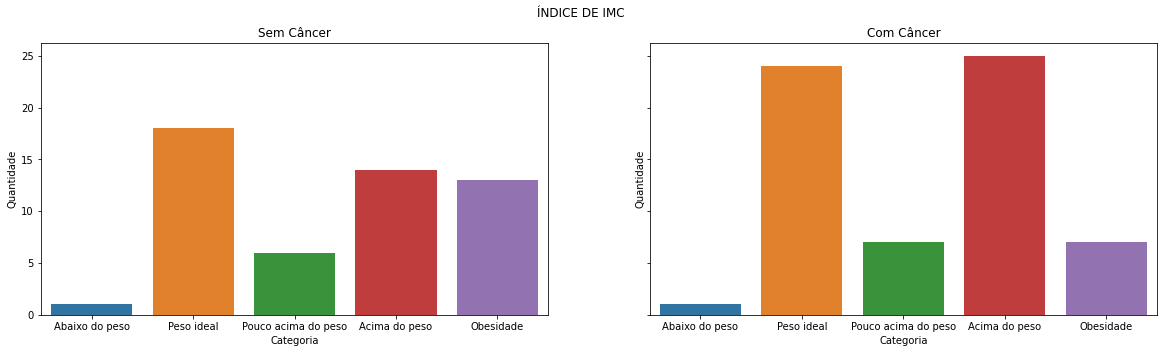

In [6]:
fig, axes = plt.subplots(1,2, figsize=[20,5], sharey=True)
fig.suptitle('ÍNDICE DE IMC')
sns.barplot(ax=axes[0], x='Categoria', y='Quantidade', data=BMI_sem_cancer)
axes[0].set_title('Sem Câncer')
sns.barplot(ax=axes[1], x='Categoria', y='Quantidade', data=BMI_com_cancer)
axes[1].set_title('Com Câncer')

### ANALISANDO GLICOSE, INSULINA E HOMA

A glicose é um tipo de açúcar, considerada a principal fonte de energia do organismo.

Este açúcar é controlado por uma hormona produzida no pâncreas chamada insulina que ajuda a mover a glicose da corrente sanguínea para as células do organismo.

Segue tabela de referencia no exame de glicose:<br>
<img src=https://www.saudebemestar.pt/media/89219/valores-de-glicemia.jpg>
fonte:https://www.saudebemestar.pt/pt/exame/analises-clinicas/glicose/#:~:text=A%20glicose%20%C3%A9%20um%20tipo,para%20as%20c%C3%A9lulas%20do%20organismo.

O Índice de Homa é uma medida que aparece no resultado do exame de sangue que serve para avaliar a resistência à insulina (HOMA-IR) e atividade do pâncreas (HOMA-BETA) e, assim, auxiliar no diagnóstico da diabetes.

Os valores normais do Índice Homa para adultos podem variar de acordo com o Índice de Massa Corporal, porém, de forma geral, os valores são:

 - Valor de Referência do Homa-IR: inferior a 2,15;
 - Valor de Referência do Homa-Beta: entre 167 e 175.

O Índice Homa é determinado através de fórmulas matemáticas que estão relacionadas com a quantidade de açúcar no sangue e quantidade de insulina produzida pelo organismo e, os cálculos incluem:

 - Fórmula para avaliar a resistência à insulina (Homa-IR): Glicemia (mmol) x Insulina (ui/ml) ÷ 22,5
 - Formula para avaliar a capacidade de funcionamento das células beta do pâncreas (Homa-Beta): 20 x Insulina (ui/ml) ÷ (Glicemia - 3,5)

OBS:A base de dados o valor de glicemia esta medido em (mg/dL) e para o calculo da HOMA utiliza-se (mmol/L), porem os dados apresentados na coluna HOMA foram realizados apos a conversão. Em caso de curiosidade com relação ao calculo de conversão, segue link de calculadora <a href=https://www.rccc.eu/ppc/calculadoras/conversor/mg-mmol.html target="_blank">clique aqui.</a>

In [7]:
# Acrescentando coluna com HOMA-BETA
sem_cancer["HOMA-BETA"] = ((sem_cancer['Insulin'] * 20) / ((sem_cancer['Glucose'] * 0.0555)-3.5))#convertendo Glucose para mmol 1mg/dL = 0,0555mmol/L
sem_cancer.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,HOMA-BETA
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,140.623377
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,38.792030
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,58.019994
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,83.413058
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,44.196762


In [8]:
filtro = sem_cancer[sem_cancer['HOMA']> 2.15]
filtro1 = sem_cancer[(sem_cancer['HOMA-BETA']>175) & (sem_cancer['HOMA']>2.15)]
filtro2 = sem_cancer[(sem_cancer['HOMA-BETA']<167) & (sem_cancer['HOMA']>2.15)]


In [9]:
com_cancer["HOMA-BETA"] = ((com_cancer['Insulin'] * 20) / ((com_cancer['Glucose'] * 0.0555)-3.5))
filtro3 = com_cancer[(com_cancer['HOMA-BETA']>175) & (com_cancer['HOMA']>2.15)]
filtro4 = com_cancer[(com_cancer['HOMA-BETA']<167) & (com_cancer['HOMA']>2.15)]
filtro5 = com_cancer[com_cancer['HOMA']>2.15]
com_cancer.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,HOMA-BETA
52,45,21.303949,102,13.852,3.485163,7.6476,21.056625,23.03408,552.444,2,128.199907
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,2,150.247117
54,49,20.956608,94,12.305,2.853119,11.2406,8.412175,23.11770,573.630,2,143.331392
55,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2,270.224159
56,42,21.359915,93,2.999,0.687971,19.0826,8.462915,17.37615,321.919,2,36.099910


In [10]:
print('QUANTIDADES DE RESULTADOS ALTERADOS DE GLICEMIA POR GRUPO')
print('-'*40)
print('Resultados Glicemia Paciente sem Câncer'.center(40))
print('-'*40)
print(f"HOMA > 2.15: {filtro.shape[0]}")
print(f"HOMA-BETA > 175 e HOMA > 2.15: {filtro1.shape[0]}")
print(f"HOMA-BETA < 167 e HOMA > 2.15: {filtro2.shape[0]}")
print('-'*40)
print('Resultados Glicemia pacientes com Câncer'.center(40))
print('-'*40)
print(f"HOMA > 2.15: {filtro5.shape[0]}")
print(f"HOMA-BETA > 175 e HOMA > 2.15: {filtro3.shape[0]}")
print(f"HOMA-BETA < 167 e HOMA > 2.15: {filtro4.shape[0]}")

QUANTIDADES DE RESULTADOS ALTERADOS DE GLICEMIA POR GRUPO
----------------------------------------
Resultados Glicemia Paciente sem Câncer 
----------------------------------------
HOMA > 2.15: 8
HOMA-BETA > 175 e HOMA > 2.15: 4
HOMA-BETA < 167 e HOMA > 2.15: 4
----------------------------------------
Resultados Glicemia pacientes com Câncer
----------------------------------------
HOMA > 2.15: 32
HOMA-BETA > 175 e HOMA > 2.15: 11
HOMA-BETA < 167 e HOMA > 2.15: 21


Text(0.5, 1.0, 'Indice de Alteração na Glicemia')

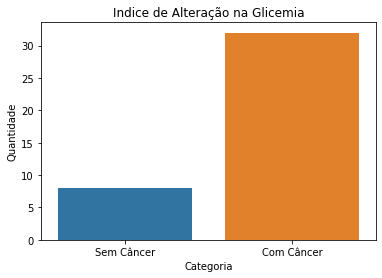

In [11]:
categoria_glicemia = ['Sem Câncer','Com Câncer']
quantidade_glicemia = [filtro.shape[0],filtro5.shape[0]]
glicemia = pd.DataFrame({'Categoria':categoria_glicemia,'Quantidade':quantidade_glicemia})
fig2 = sns.barplot(x='Categoria', y='Quantidade', data=glicemia)
fig2.set_title('Indice de Alteração na Glicemia')


### ANALISANDO LEPTINA, ADPONECTINA E RESISTINA

A leptina é um hormônio produzido pelas células de gordura, que age diretamente no cérebro e que tem como principais funções controlar o apetite, reduzir a ingestão de alimentos e regular o gasto energético, permitindo manter o peso corporal.

Os valores normais de leptina dependem do sexo, do índice de massa corporal e da idade, segue valores de referência para mulheres:

 - Mulheres com IMC de 18 a 25: 4,7 a 23,7 ng/mL;
 - Mulheres com IMC maior que 30: 8,0 a 38,9 ng/mL;<br>
Fonte:https://www.tuasaude.com/como-controlar-a-leptina-e-emagrecer-de-vez/#:~:text=Homens%20com%20IMC%20maior%20que,24%2C9%20ng%2FmL.

A adiponectina é uma proteína sintetizada pelos adipócitos. Possui propriedades antiaterogênicas e sensibilizadoras da ação da insulina. Tem sido utilizada avaliação de resistência à insulina, predição de esteatose hepática não alcóolica e risco de aterogênese. Geralmente é inversamente proporcional ao índice de massa corpórea, resistência insulínica, cintura abdominal e leptina. Está diminuída em pacientes com lipodistrofia e em uso de terapia antirretroviral. Níveis baixos em obesos estão associados a aumento de esteatose hepática não alcóolica. Níveis elevados estão associados a melhor sensibilidade insulínica e controle de diabetes, melhor controle lipidico e menor reação inflamatória associada ao diabetes mellitus.

Valores de referência:
 - Mulheres: 2,00 a 25,00 µg/mL
<br>Fonte: https://dnaclinic.com.br/exames-laboratoriais/adiponectina-adipo

A resistina é uma proteína produzida pelos adipócitos e macrófagos que está associada ao desenvolvimento de resistência insulínica.

Fonte: Revista Brasileira de Obesidade, Nutrição e Emagrecimento
ISSN 1981-9919 versão eletrônica

Text(0.5, 1.0, 'Valores Leptina x IMC')

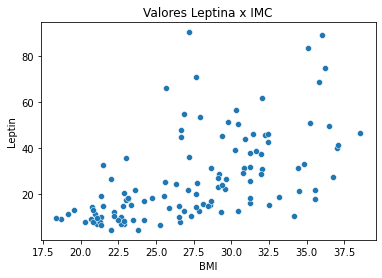

In [12]:
fig3 = sns.scatterplot(x='BMI', y='Leptin', data=df)
fig3.set_title('Valores Leptina x IMC')

O gráfico mostra que o valor do IMC é diretamente proporcional as taxas de Leptina.

A leptina alta, conhecida cientificamente como hiperleptinemia, geralmente ocorre em casos de obesidade, pois como se tem muitas células de gordura, a produção de leptina está sempre aumentada, quando isso acontece, o cérebro passa a considerar a leptina alta como sendo normal e sua ação de regular a fome deixa de ser eficaz. 

In [13]:
filtro_leptin_sem_cancer = sem_cancer[
                                ((sem_cancer['BMI']>=18) & (sem_cancer['BMI']<=25) & ((sem_cancer['Leptin'] < 4.7) | (sem_cancer['Leptin']>23.7))) | 
                                ((sem_cancer['BMI']> 30) & ((sem_cancer['Leptin'] < 8) | (sem_cancer['Leptin'] > 38.9)))
                                ]
filtro_leptin_sem_cancer

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,HOMA-BETA
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1,42.440144
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1,35.572073
11,29,23.010000,82,5.663,1.145436,35.5900,26.720000,4.58000,174.800,1,107.764034
16,47,22.030000,84,2.869,0.590000,26.6500,38.040000,3.32000,191.720,1,49.380379
19,32,36.512637,87,14.026,3.009980,49.3727,5.100000,17.10223,588.460,1,211.155438
22,29,32.270788,84,5.810,1.203832,45.6196,6.209635,24.60330,904.981,1,100.000000
23,35,30.276817,84,4.376,0.906707,39.2134,9.048185,16.43706,733.797,1,75.318417
25,45,37.035608,83,6.760,1.383997,39.9802,4.617125,8.70448,586.173,1,122.187076
26,50,38.578759,106,6.703,1.752611,46.6401,4.667645,11.78388,887.160,1,56.256819
27,66,31.446541,90,9.245,2.052390,45.9624,10.355260,23.38190,1102.110,1,123.678930


Text(0.5, 1.0, 'Quantidade vs Taxa Leptina (pacientes sem Câncer)')

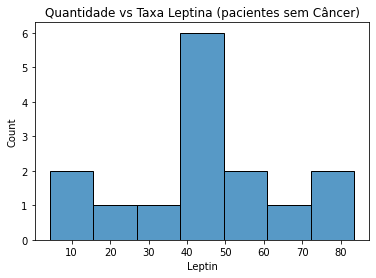

In [14]:
fig4 = sns.histplot(x='Leptin', data=filtro_leptin_sem_cancer)
fig4.set_title('Quantidade vs Taxa Leptina (pacientes sem Câncer)')

In [15]:
filtro_Leptin_com_cancer = com_cancer[
                                ((com_cancer['BMI']>=18) & (com_cancer['BMI']<=25) & ((com_cancer['Leptin'] < 4.7) | (com_cancer['Leptin']>23.7))) | 
                                ((com_cancer['BMI']> 30) & ((com_cancer['Leptin'] < 8) | (com_cancer['Leptin'] > 38.9)))
                                ]
filtro_Leptin_com_cancer

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,HOMA-BETA
61,69,21.513859,112,6.683,1.846290,32.5800,4.138025,15.69876,713.239,2,49.212077
82,48,32.461911,99,28.677,7.002923,46.0760,21.570000,10.15726,738.034,2,287.560792
93,49,32.461911,134,24.887,8.225983,42.3914,10.793940,5.76800,656.393,2,126.426213
102,65,30.915577,97,10.491,2.510147,44.0217,3.710090,20.46850,396.648,2,111.398991
105,73,37.109375,134,5.636,1.862886,41.4064,3.335665,6.89235,788.902,2,28.630937
109,75,30.480000,152,7.010,2.628283,50.5300,10.060000,11.73000,99.450,2,28.403566
110,54,36.050000,119,11.910,3.495982,89.2700,8.010000,5.06000,218.280,2,76.727331
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2,60.844173


Text(0.5, 1.0, 'Quantidade vs Taxa Leptina (pacientes com Câncer)')

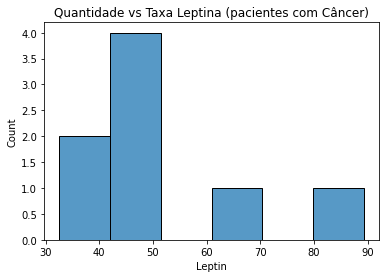

In [16]:
fig5 = sns.histplot(x='Leptin', data=filtro_Leptin_com_cancer)
fig5.set_title('Quantidade vs Taxa Leptina (pacientes com Câncer)')

Os histogramas mostram que em ambos os grupos existem uma concentração de Leptina que variam entre 30 ng/mL à 50 ng/mL com IMC superior a 30.

In [17]:
#Criando filtro de Sub-categorias de IMC

filtro_peso_ideal = df[(df['BMI'] >= 19.1) & (df['BMI'] < 25.9)]
filtro_sobre_peso = df[(df['BMI'] >= 25.9) & (df['BMI'] < 27.4)]
filtro_obeso = df[df['BMI']>= 32.4]
filtro_peso_ideal['Grupo'] = 'Peso ideal'
filtro_sobre_peso['Grupo'] = 'Sobre peso'
filtro_obeso['Grupo'] = 'Obeso'
filtro_geral = pd.concat([filtro_peso_ideal,filtro_sobre_peso,filtro_obeso])
filtro_geral

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,Grupo
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,Peso ideal
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,Peso ideal
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,Peso ideal
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,Peso ideal
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,Peso ideal
...,...,...,...,...,...,...,...,...,...,...,...
104,57,34.838148,95,12.548,2.940415,33.1612,2.364950,9.95420,655.834,2,Obeso
105,73,37.109375,134,5.636,1.862886,41.4064,3.335665,6.89235,788.902,2,Obeso
107,46,33.180000,92,5.750,1.304867,18.6900,9.160000,8.89000,209.190,2,Obeso
108,68,35.560000,131,8.150,2.633537,17.8700,11.900000,4.19000,198.400,2,Obeso


Text(0.5, 1.0, 'Valores de Resistina por Grupos (IMC)')

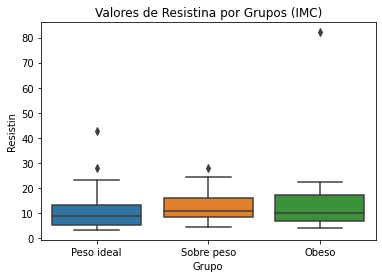

In [18]:
fig6 = sns.boxplot(x='Grupo', y='Resistin', data=filtro_geral)
fig6.set_title('Valores de Resistina por Grupos (IMC)')

O gráfico mostra uma alta elevação da Resistina nos grupos Sobre peso e Obeso. Como uma de sua função é o bloqueio da Leptina, que é o hormonio escretado pelo tecido adiposo que induz a saciedade, aumentando dessa forma a resistência a insulina.

Obtenha o feedback de suas ideias e de sua(s) visualização(ões), se possivel apresente esse grafico com pelo menos uma outra pessoa e questione:

1. O que você percebe na visualização?
2. Quais perguntas você tem sobre o conjunto de dados?
3. Há algo que você não entende nas visualizações?

**RESPOSTA** (VALE 0.6 pontos): (responda aqui, dê dois cliques para editar)<br>
R01: As visualizações mostram que parece haver uma relação entre a obesidade e má absorção de energia do organismo com o câncer de mama.

R02: Não teve novas perguntas.

R03: Não houve uma compreensão do boxplot.

Após o feedback, o que você mudaria?

**RESPOSTA** (VALE 0.6 pontos): (responda aqui, dê dois cliques para editar)

Farei uma modificação no gráfico que mostra a relação da Resistina com os grupos de IMC.

Apresente suas nova(s) visualização(ões) a partir do feedback:

Text(0.5, 1.0, 'Quantitativo de Resistina por Grupo')

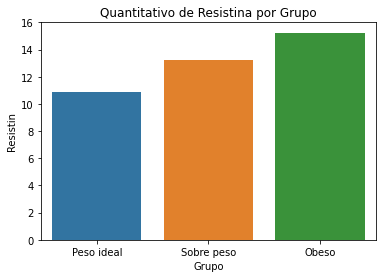

In [30]:
#### VALE 0.6 pontos
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

fig7 = sns.barplot(x='Grupo', y='Resistin', data=filtro_geral, ci=None)
fig7.set_title("Quantitativo de Resistina por Grupo")

O grafico mostra o quantitativo de Resistina por grupos, note que quanto maior o nivel de sobre peso maior a Resistina.

# Exercicio 3. (5.0 pontos)

Construa um modelo de regressão logistica para predizer a variável **Classification** com **statsmodels.api**.

In [20]:
#### VALE 0.8 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
import statsmodels.api as sm

X = df.drop('Classification', axis=1)
y = np.array(df['Classification'])
y[y == 1] = 0
y[y == 2] = 1
X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
result=logit_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.481603
         Iterations 9


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Coloque abaixo a saida do seu modelo usando **seu_modelo.summary()**.

In [21]:
#### VALE 0.8 pontos
#### EXECUTE O COMANDO ABAIXO
print(result.summary())
#.

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  116
Model:                          Logit   Df Residuals:                      106
Method:                           MLE   Df Model:                            9
Date:                Thu, 05 May 2022   Pseudo R-squ.:                  0.2998
Time:                        22:23:10   Log-Likelihood:                -55.866
converged:                       True   LL-Null:                       -79.783
Covariance Type:            nonrobust   LLR p-value:                 2.742e-07
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.6512      3.358     -1.683      0.092     -12.233       0.931
Age            -0.0234      0.016     -1.495      0.135      -0.054       0.007
BMI            -0.1501      0.067     -2.224    

Faça outro modelo usando a biblioteca **sklearn** e usem o parametro **random_state** com valor 10.

In [22]:
#### VALE 0.8 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

X1 = df.drop(['Classification'], axis = 1)
y1 = np.array(df['Classification'])
X1_std = StandardScaler().fit_transform(X1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1_std, y, test_size = 0.3, random_state=10)

lr1 = LogisticRegression(random_state=10)
lr1.fit(X1_train, y1_train)
y1_pred = lr1.predict(X1_test)


Coloque abaixo a matriz de confusão do modelo feito:

In [23]:
#### VALE 0.8 pontos
#### EXECUTE O COMANDO ABAIXO
matrix = pd.DataFrame(confusion_matrix(y1_test, y1_pred), columns=['NÃO','SIM'], index=['Sem Câncer','Com Câncer'])
matrix


,NÃO,SIM
Sem Câncer,13,3
Com Câncer,3,16


Prencha as métricas a partir da matriz de confusão obtida (lembrando que a classe negativa é 1 - sem cancer e a classe positiva é 2 - com cancer)

In [24]:
# VALE 0.8 pontos
# Substitua __ pelos valores solicitados
print('acurácia: {}'.format((matrix['SIM'][1] + matrix['NÃO'][0]) / (sum(matrix['SIM']) + sum(matrix['NÃO']))))
print('precisão: {}'.format(matrix['SIM'][1] / (matrix['SIM'][1] + matrix['SIM'][0])))
print('especificidade: {}'.format(matrix['NÃO'][0] / (matrix['NÃO'][0] + matrix['SIM'][0])))
print('sensitividade: {}'.format(matrix['SIM'][1] / (matrix['SIM'][1] + matrix['NÃO'][1])))

acurácia: 0.8285714285714286
precisão: 0.8421052631578947
especificidade: 0.8125
sensitividade: 0.8421052631578947


Observando a matriz de confusão, o seu modelo tende a obter mais erros do tipo I ou do tipo II?

**RESPOSTA** (VALE 1.0 ponto): Dos 16 pacientes com câncer o modelo acertou 13 e errou 3 o que equivale a 81% de acertos, já entre os pacientes que não tinha câncer dos 19 ele acertou 16 e errou 3, o que equivale a 84% de acertos, conclusão a diferença é minima entre as predições de ambos os casos precisaria de um maior número de amostras para chegar a uma conclusão precisa, porem nas amostras estudada, por uma diferença de 3%, o modelo foi melhor para predizer pacientes sem câncer.